- Link: https://tradewithpython.com/generating-buy-sell-signals-using-python
# TOC
## SMA
1. **LB1**: Import libraries
2. **IP1**: **Get data** OHLCVAdjC from data for multiple tickers
3. **MA1**: Set 2 data columns for long and short SMA
4. **MA2**: Create function to make decision base on SMA Cross
5. **MA3**: All decision columns into dataframe
6. **MA4**: Plotting SMA Strategy
    - Line plot for SMA30, SMA100, AdjClose
    - Scatter plot for decision data
---
## MACD

7. **CD1**: Create MACD data columns
8. **CD2**: Append MACD data columns into dataframe
9. **CD3**: Create function to make decision base on MACD
10. **CD4**: Run MACD function with risk = 0.025
11. **CD5**: Function with MACDh 
12. **CD6**: Plot 2 graphs
    - 1 for MACD Buy and Sell
    - 1 for MACD plot

---
## Bollinger Bands
13. **BB1**: Create BB strategy
14. **BB2**: Run BB Strategy with data
15. **BB3**: Plot 2 graphs
    - 1 for Buy and Sell decisions
    - 1 for Bollinger Bands

In [1]:
# LB1
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
pd.set_option('display.max_rows', 100)

# SMA

In [2]:
# IP1
plt.style.use('fivethirtyeight')
yf.pdr_override()

symbol = ['GOOG']
start_date = date(2017, 8, 4)
end_date = date.today()
print(end_date)

def getMyPortfolio(stocks = symbol, start = start_date, end = end_date):
    data = web.get_data_yahoo(stocks, start = start, end = end)
    return data

data = getMyPortfolio(symbol)
data

2023-06-08
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000
...,...,...,...,...,...,...
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400
2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500


In [3]:
# MA1
data['SMA 30'] = ta.sma(data['Close'], 30)
data['SMA 100'] = ta.sma(data['Close'], 100)

# MA2
'''
- Create Buy and Sell list
- Set Position
- If MA30 > MA100 + Position = False:
    - Buy append price
    - Sell append NaN
    - Else NaN
- If MA30 < MA100 + Position = True
    - Sell append price
    - Buy append NaN
    - Else NaN
- Else NaN
'''
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False:
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
    
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)

    return pd.Series([signalBuy, signalSell])

In [4]:
# MA3
data['Buy_Signal_Price'], data['Sell_Signal_Price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000,NaN,NaN,NaN,NaN
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,NaN,NaN,NaN,NaN
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,NaN,NaN,NaN,NaN
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,NaN,NaN,NaN,NaN
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700,114.567167,103.46595,NaN,NaN
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400,115.211500,103.83025,NaN,NaN
2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500,115.902167,104.20415,NaN,NaN


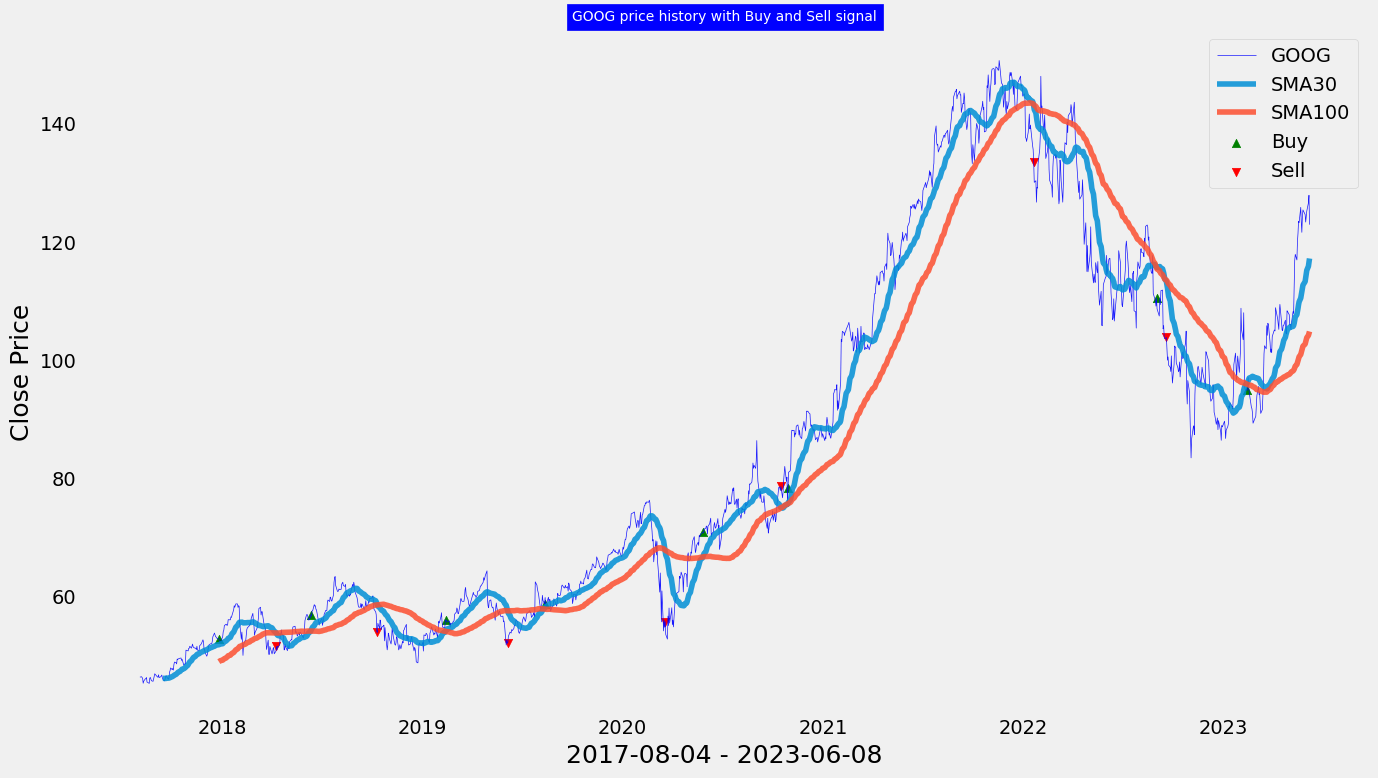

In [ ]:
# MA4
fig, ax = plt.subplots(figsize = (14,8))
ax.plot(data['Adj Close'], label = symbol[0], linewidth = 0.5, color = 'blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100', alpha = 0.85)

ax.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green', alpha = 1)
ax.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red', alpha = 1)
ax.set_title(symbol[0] + " price history with Buy and Sell signal", fontsize = 10, backgroundcolor = 'blue', color = 'white')
ax.set_xlabel(f'{start_date} - {end_date}', fontsize = 18)
ax.set_ylabel('Close Price', fontsize = 18)

legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

# MACD

In [6]:
# CD1
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-08-04,NaN,NaN,NaN
2017-08-07,NaN,NaN,NaN
2017-08-08,NaN,NaN,NaN
2017-08-09,NaN,NaN,NaN
2017-08-10,NaN,NaN,NaN
...,...,...,...
2023-06-01,4.563355,0.008361,4.554994
2023-06-02,4.468152,-0.069473,4.537626
2023-06-05,4.454324,-0.066641,4.520965


In [7]:
# CD2
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700,114.567167,103.46595,NaN,NaN,4.563355,0.008361,4.554994
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400,115.211500,103.83025,NaN,NaN,4.468152,-0.069473,4.537626
2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500,115.902167,104.20415,NaN,NaN,4.454324,-0.066641,4.520965


In [8]:
# CD3
'''
- If MACD > MACDs:
    -> Sell NaN. 
    - If position = False:
        - Buy
    - Else:
        - NaN

- Elif MACD < MACDs:
    -> Buy NaN
    - If position = True:
        - Buy
    - Else:
        - NaN

- Elif position = True +  Close < MACD_Buy[-1] * (1-risk):
    -> Sell 

- Elif position = True + Close <  Close[i-1] * (1-risk):
    -> Sell
'''
def MACD_Strategy(df, risk):
    MACD_Buy = []
    MACD_Sell = []
    position = False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i]:
            MACD_Sell.append(np.nan)
            if position == False:
                MACD_Buy.append(df['Adj Close'][i])
                position = True
            else:
                MACD_Buy.append(np.nan)
        
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i]:
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position == False
            else:
                MACD_Sell.append(np.nan)
        
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1-risk):
            MACD_Sell.append(df['Adj Close'][i])
            MACD_Buy.append(np.nan)
            position = False

        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1-risk):
            MACD_Sell.append(df['Adj Close'][i])
            MACD_Buy.append(np.nan)
            position = False
        
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data["MACD_Buy_Signal_Price"] = MACD_Buy
    data["MACD_Sell_Signal_Price"] = MACD_Sell

In [9]:
# CD4
MACD_Strategy = MACD_Strategy(data, 0.025)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_Price,MACD_Sell_Signal_Price
Date,,,,,,,,,,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700,114.567167,103.46595,NaN,NaN,4.563355,0.008361,4.554994,NaN,NaN
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400,115.211500,103.83025,NaN,NaN,4.468152,-0.069473,4.537626,NaN,125.230003
2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500,115.902167,104.20415,NaN,NaN,4.454324,-0.066641,4.520965,NaN,126.629997


In [10]:
# CD5
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color
                   
data['positive'] = MACD_color(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_Price,MACD_Sell_Signal_Price,positive
Date,,,,,,,,,,,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700,114.567167,103.46595,NaN,NaN,4.563355,0.008361,4.554994,NaN,NaN,False
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400,115.211500,103.83025,NaN,NaN,4.468152,-0.069473,4.537626,NaN,125.230003,False
2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500,115.902167,104.20415,NaN,NaN,4.454324,-0.066641,4.520965,NaN,126.629997,True


C:\Users\duong\AppData\Local\Temp\ipykernel_19188\2682641438.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((14,8), (0,0), rowspan=8, colspan=14)


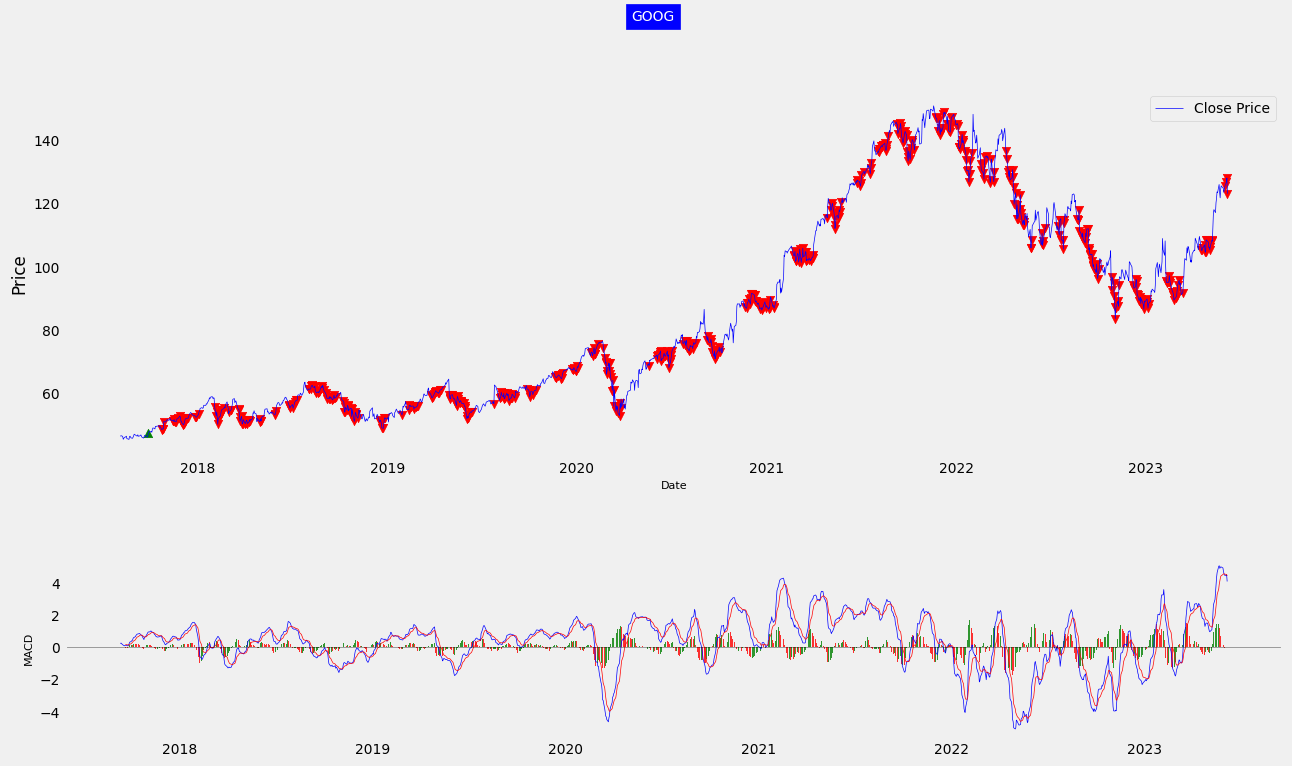

In [15]:
# CD6: Plot 2 graphs
# - 1 for MACD Buy and Sell
# - 1 for MACD plot
plt.rcParams.update({'font.size':10})
fig, ax1 = plt.subplots(figsize = (14,8))
fig.suptitle(symbol[0], fontsize = 10, backgroundcolor = 'blue', color = 'white')

ax1 = plt.subplot2grid((14,8), (0,0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14,12), (10,0), rowspan=6, colspan=14)

ax1.set_ylabel('Price')
ax1.plot('Adj Close', data = data, label = 'Close Price', linewidth = 0.5, color = 'blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_Price'], color = 'green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_Price'], color = 'red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize = 8)

ax2.set_ylabel('MACD', fontsize = 8)
ax2.plot('MACD_12_26_9', data=data, label = 'MACD', linewidth = 0.5, color = 'blue')
ax2.plot('MACDs_12_26_9', data=data, label = 'signal', linewidth = 0.5, color = 'red')
ax2.bar(data.index, 'MACDh_12_26_9', data = data, label = 'Volume', color = data.positive.map({True: 'g', False: 'r'}), width=1, alpha=0.8)
ax2.axhline(0, color='black', linewidth = 0.5, alpha = 0.5)
ax2.grid()

plt.show()

# Bollinger Bands

In [16]:
# BB1: Create BB strategy
'''
Set parameters:
- BB Buy and Sell list
- Position
- BB Bands
- Data

- If Close < BB:
    - If Position = False:
        -> Buy
    - Else:
        -> NaN

- Elif Close > BB:
    - If Position = True:
        -> Sell
    - Else:
        -> NaN

- Else:
    - NaN
''' 
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Adj Close'], length=20, std=2)
    data = pd.concat([data, bb], axis = 1).reindex(data.index)

    for i in range(0, len(data)):
        if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
            if position == False:
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBL_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else:
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_Price'] = bbBuy
    data['bb_Sell_Signal_Price'] = bbSell

    return data

In [17]:
# BB2: Run BB Strategy with data
data = bb_strategy(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_Price,Sell_Signal_Price,...,MACD_Buy_Signal_Price,MACD_Sell_Signal_Price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_Price,bb_Sell_Signal_Price
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-04,46.337502,46.515350,46.151501,46.397999,46.397999,21646000,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,46.452999,46.584999,46.325001,46.467999,46.467999,20644000,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,46.354500,46.790699,46.280499,46.339500,46.339500,21232000,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,46.030499,46.299000,45.862499,46.145000,46.145000,23842000,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,45.877499,45.963001,45.306499,45.362000,45.362000,36480000,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,123.500000,125.040001,123.300003,124.370003,124.370003,25017700,114.567167,103.46595,NaN,NaN,...,NaN,NaN,False,105.140797,118.64825,132.155702,22.768903,0.711800,NaN,NaN
2023-06-02,124.489998,126.745003,124.349998,125.230003,125.230003,19362400,115.211500,103.83025,NaN,NaN,...,NaN,125.230003,False,107.361458,119.64925,131.937042,20.539690,0.727085,NaN,NaN
2023-06-05,124.610001,127.989998,124.379997,126.629997,126.629997,22672500,115.902167,104.20415,NaN,NaN,...,NaN,126.629997,True,109.694006,120.67000,131.645994,18.191753,0.771501,NaN,NaN


C:\Users\duong\AppData\Local\Temp\ipykernel_19188\4119833402.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan= 8, colspan=14)


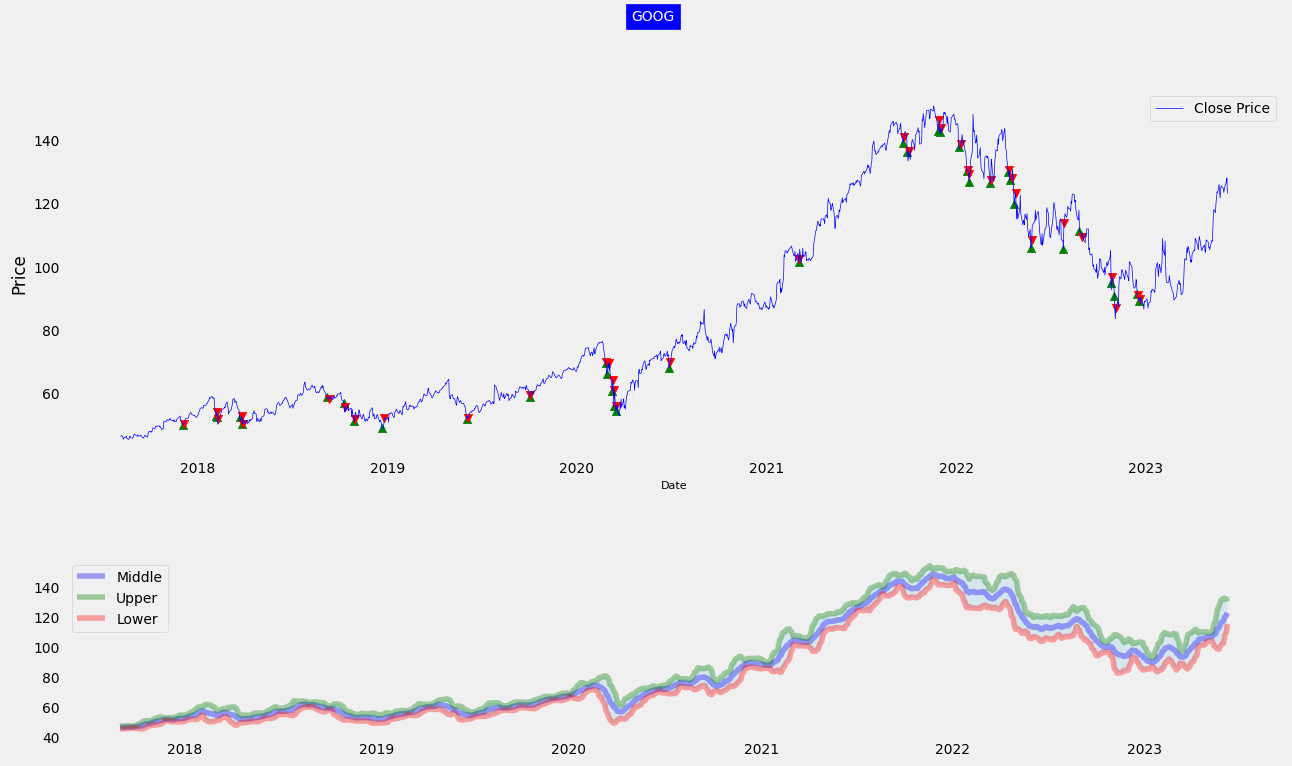

In [18]:
# BB3: Plot 2 graphs
#   - 1 for Buy and Sell decisions
#   - 1 for Bollinger Bands
fig, ax1 = plt.subplots(figsize = (14,8))
fig.suptitle(symbol[0], fontsize = 10, backgroundcolor = 'blue', color = 'white')

ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan= 8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan= 6, colspan=14)

ax1.set_ylabel('Price')
ax1.plot(data['Adj Close'], label = 'Close Price', linewidth = 0.5, color = 'blue')
ax1.scatter(data.index, data['bb_Buy_Signal_Price'], color = 'green', marker = '^', alpha = 1)
ax1.scatter(data.index, data['bb_Sell_Signal_Price'], color = 'red', marker = 'v', alpha = 1)

ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize = 8)

ax2.plot(data['BBM_20_2.0'], label = 'Middle', color = 'blue', alpha = 0.35)
ax2.plot(data['BBU_20_2.0'], label = 'Upper', color = 'green', alpha = 0.35)
ax2.plot(data['BBL_20_2.0'], label = 'Lower', color = 'red', alpha = 0.35)
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha = 0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()